# import and load data

In [2]:
from my_imports import *
import stanTools
from sklearn import mixture
from collections import Counter
import copy
import plotMutationMatrix as pmm
import natureTools as nt
# to use  my own stylimport matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

mpl.rcParams.update(mpl.rcParamsDefault)

avb_cols = {'pur':'#5B49B6', 
            'blu':'#52A4D9', 
            'tur':'#59C09D',
            'tea':'#B3EBAD',
            'yel': '#C3D64C',
            'gra':'#9B9B9D'}
avb_contrast_cols = {
    'p': '#C17EFF',
    'g': '#75C26A'
}
plt.style.use('/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/paper_style1.mplstyle')




/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/evcouplings/__init__.py
/Users/davidding/anaconda3/envs/tf_env/lib/python3.7/site-packages/evcouplings/__init__.py


In [3]:
pin = './2009_out/processing/'
plot_out = './2009_out/singles/'

In [4]:
%run -i 2012_load_data.py

# of nontoxic mutants in all concentrations 839
# of toxin mutants that are toxic in all conditions: 311
# of nontoxic mutants in all concentrations 855
# of toxin mutants that are toxic in all conditions: 781
len of mt_toxins: 310
len of ta_toxins 781
15
15
30
37


2012_load_data.py:636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_muts_mt_wt_toxin['t_pos_pdb'] = df_muts_mt_wt_toxin.t_mut.str[1:-1].astype(int) +1
2012_load_data.py:737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_curr['at_mut'] = [at] * len(df_curr)


In [5]:
%run -i 2103_read_ec_files.py

added so many missing rows to df_longrange 736
added so many missing rows to df_longrange 729
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 752
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 806
added so many missing rows to df_longrange 744
added so many missing rows to df_longrange 751
added so many missing rows to df_longrange 810
1389.0


/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1466: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_inter'] = tp_inter
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1467: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['tp_mono1'] = tp_mono1
/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/src/natureTools.py:1468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

1390.0
1197.0
1189.0
1140.0
1047.0
915.0
1410.0
1198.0
1410.0
1198.0
added so many missing rows to df_longrange 806
915.0


# Fig.2a antitoxin

In [6]:
# load antitoxin data
df_at = pd.read_csv(pin + 'df_all_at_lib.csv')
df_at = df_at.set_index('aa_mut')

In [9]:
# read in norm syn fits

'''
# this takes a long time to read in.
bayes_at_dir = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex51_set_up_additional_mutants/illumina/data/bayes_o2_2009/raw/at/'
df_fit = pd.read_csv(bayes_at_dir + 'df_sm_bhs_diff_w_aa_m_41_tc_nov2.csv')

# get synonymous codon fitnesses
syn_cols = [c for c in df_fit.columns if c.startswith('w_cod[')]
syn_means = np.mean(df_fit[syn_cols])
w_aa_mean = np.mean(df_fit['w_aa'])
norm_syn_means = syn_means - w_aa_mean
pickle.dump(norm_syn_means, open(plot_out + 'norm_syn_means_at.p', 'wb'))
'''

norm_syn_means = pickle.load(open(plot_out + 'norm_syn_means_at.p', 'rb'))
norm_syn_mean_log2 = norm_syn_means/np.log(2)

# stop fits
stop_fits = df_at.loc[(df_at.index.str[-1]=='_') & (df_at.index.str[1:-1].astype(int) < 77)]['at_lib_mean_fit']


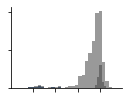

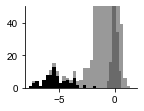

In [25]:
#plotting
fig = plt.figure(figsize=(2,1.5))
n, bins, patches = plt.hist(df_at['at_lib_mean_fit'], bins=30, label='all AT*', alpha=0.4, color='black')#, histtype='step', color='black')

# plot synonymous
n_syn, bins_syn, patches_syn = plt.hist(norm_syn_mean_log2, bins=6, label='synonymous AT', 
                                        alpha=0.3, color='black') #color='#81b29a')#, color=avb_cols['blu'])
#plot stop fits
plt.hist(stop_fits, bins=bins,alpha=0.8, label='truncated AT', color='#2E4057')

#plt.legend(labelspacing=0.1, prop={'size': 5}, loc='upper left')
#plt.ylabel('frequency')
#plt.xlabel('GRmut - GRwt')
plt.xlim((-8,2))
plt.xticks([-6,-4,-2,0])
plt.yticks(ticks = [0,200,400], labels=[])
plt.xticks(ticks=[-6,-4,-2,0],labels=[])

fig.patch.set_visible(False)
plt.savefig(plot_out + 'at_syn_stop_hist.svg', format = 'svg')
plt.savefig(plot_out + 'at_syn_stop_hist.pdf', format = 'pdf')
plt.show()


#plotting
fig = plt.figure(figsize=(2,1.5))
plt.hist(df_at['at_lib_mean_fit'], bins=bins, label='all AT*', histtype='stepfilled', color='black',  alpha=0.4)
plt.hist(norm_syn_mean_log2, bins=bins_syn, label='synonymous AT', alpha=0.3,color = 'black')#color='#81b29a')
plt.hist(stop_fits, bins=bins,alpha=1, label='truncated AT', color='black')

#plt.legend(labelspacing=0.1, prop={'size': 5})
#plt.ylabel('frequency')
#plt.xlabel('GRmut - GRwt')
plt.xlim((-8,2))
plt.ylim([0,50])
#plt.xticks([-6,-4,-2,0])
#plt.yticks(ticks = [0,20,40], labels=[])
#plt.xticks(ticks=[-6,-4,-2,0],labels=[])

fig.patch.set_visible(False)
plt.savefig(plot_out + 'at_syn_stop_hist_zoom.svg', format = 'svg')
plt.savefig(plot_out + 'at_syn_stop_hist_zoom.pdf', format = 'pdf')
plt.show()


In [10]:
# get some numbers for the paper
#mean of stop
np.mean(stop_fits)

#mean of all other variants
np.mean(df_at.loc[df_at.index.str[-1]!= '_']['at_lib_mean_fit'])

-0.5098493644116482

In [14]:
#fraction of single muts abnove -2
np.sum(df_at.loc[df_at.index.str[-1]!= '_']['at_lib_mean_fit'] >-2.5)/len(df_at.loc[df_at.index.str[-1]!= '_']['at_lib_mean_fit'])

0.9816933638443935

In [15]:
# number deleterious at
np.sum(df_at.loc[df_at.index.str[-1]!= '_']['at_lib_mean_fit'] <-2.5)

32

In [21]:
muts_tolerated = ['F','H', 'Y', 'L', 'M', 'V', 'I']
full_muts_tolerated = ['W59'+ subs for subs in muts_tolerated]
w59_cols = df_at.loc[df_at.index.str[:-1]== 'W59']

w69_not_tol = w59_cols.loc[~w59_cols.index.isin(full_muts_tolerated)]
w69_not_tol

,at_lib_mean_fit,at_lib_2.5%,at_lib_25%,at_lib_50%,at_lib_75%,at_lib_97.5%,at_lib_p,at_lib_neg_log_p_tail
aa_mut,,,,,,,,
W59A,-1.658349,-2.053110,-1.781884,-1.648929,-1.524377,-1.293968,1.0000,9.210340
W59C,-1.095123,-1.458060,-1.211886,-1.098863,-0.983196,-0.710512,0.9996,7.824046
W59D,-7.251132,-9.920386,-7.949376,-7.121758,-6.394399,-5.276735,1.0000,9.210340
W59E,-5.296223,-6.707611,-5.721100,-5.260102,-4.849449,-4.076450,1.0000,9.210340
W59G,-5.009273,-5.930098,-5.254630,-4.977907,-4.735415,-4.247223,1.0000,9.210340
W59I,-1.687910,-2.143101,-1.826686,-1.686010,-1.544034,-1.267311,1.0000,9.210340
W59K,-5.140701,-6.565959,-5.566233,-5.100214,-4.671414,-3.925940,1.0000,9.210340
W59N,-3.837633,-4.807183,-4.131028,-3.818726,-3.531700,-2.961654,1.0000,9.210340
W59P,-5.585534,-6.713775,-5.965480,-5.566475,-5.203801,-4.559568,1.0000,9.210340


# Fig 2B plotting AT smm

In [11]:
# get secondary structure elements

def get_sec_struc_elems():
    # create df_dssp
    importlib.reload(pdbt)
    # for the naked toxin
    f_path_tox = '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/ex47/pdb/toxin_chainB_only.pdb'
    dssp_toxin_only = pdbt.create_dssp(f_path_tox)
    df_rsa_toxin_only = pdbt.make_df_rsa('B', dssp_toxin_only)
    # for the whole complex
    f_path_all = '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/ex47/pdb/bio_all.pdb'
    dssp_all = pdbt.create_dssp(f_path_all)
    df_rsa_all_t = pdbt.make_df_rsa('B', dssp_all)
    df_rsa_all_at = pdbt.make_df_rsa('A', dssp_all)



    # to creat the secondary structure lists

    df_secondary_toxin_3state = pdbt.get_df_secondary(dssp_toxin_only, ch_id ='B', reduced_state=True)
    df_secondary_toxin_all_states = pdbt.get_df_secondary(dssp_toxin_only, ch_id ='B', reduced_state=False)

    sse_str_toxin = pdbt.get_sse_str(df_secondary_toxin_3state)

    sec_segments_toxin = pdbt.find_secondary_structure_segments(sse_str_toxin)

    df_secondary_at_3state = pdbt.get_df_secondary(dssp_all, ch_id='A', reduced_state=True)
    sse_str_at = pdbt.get_sse_str(df_secondary_at_3state)

    sec_segments_at = pdbt.find_secondary_structure_segments(sse_str_at)

    # make sequence, seqment structure list for antitoxin
    seq_seg_list_full_at = []
    sec_start, sec_stop, sec_seg_list = sec_segments_at
    for (t, start, stop) in sec_seg_list:
        if stop == sec_stop +1:
            seq_seg_list_full_at.append((t, start, stop))
            seq_seg_list_full_at.append((t, stop, 93))
        else:
            seq_seg_list_full_at.append((t, start, stop))

    # make sequence, seqment structure list for toxin
    seq_seg_list_full_t = []
    sec_start, sec_stop, sec_seg_list = sec_segments_toxin
    for (t, start, stop) in sec_seg_list:
        if stop == sec_stop +1:
            seq_seg_list_full_t.append((t, start, stop))
            seq_seg_list_full_t.append((t, stop, 103))
        else:
            seq_seg_list_full_t.append((t, start, stop))

    return seq_seg_list_full_t, seq_seg_list_full_at

seq_seg_list_full_t, seq_seg_list_full_at = get_sec_struc_elems()

-7.7039105738399485 7.7039105738399485
./2009_out/singles/wtAT_h_seismic


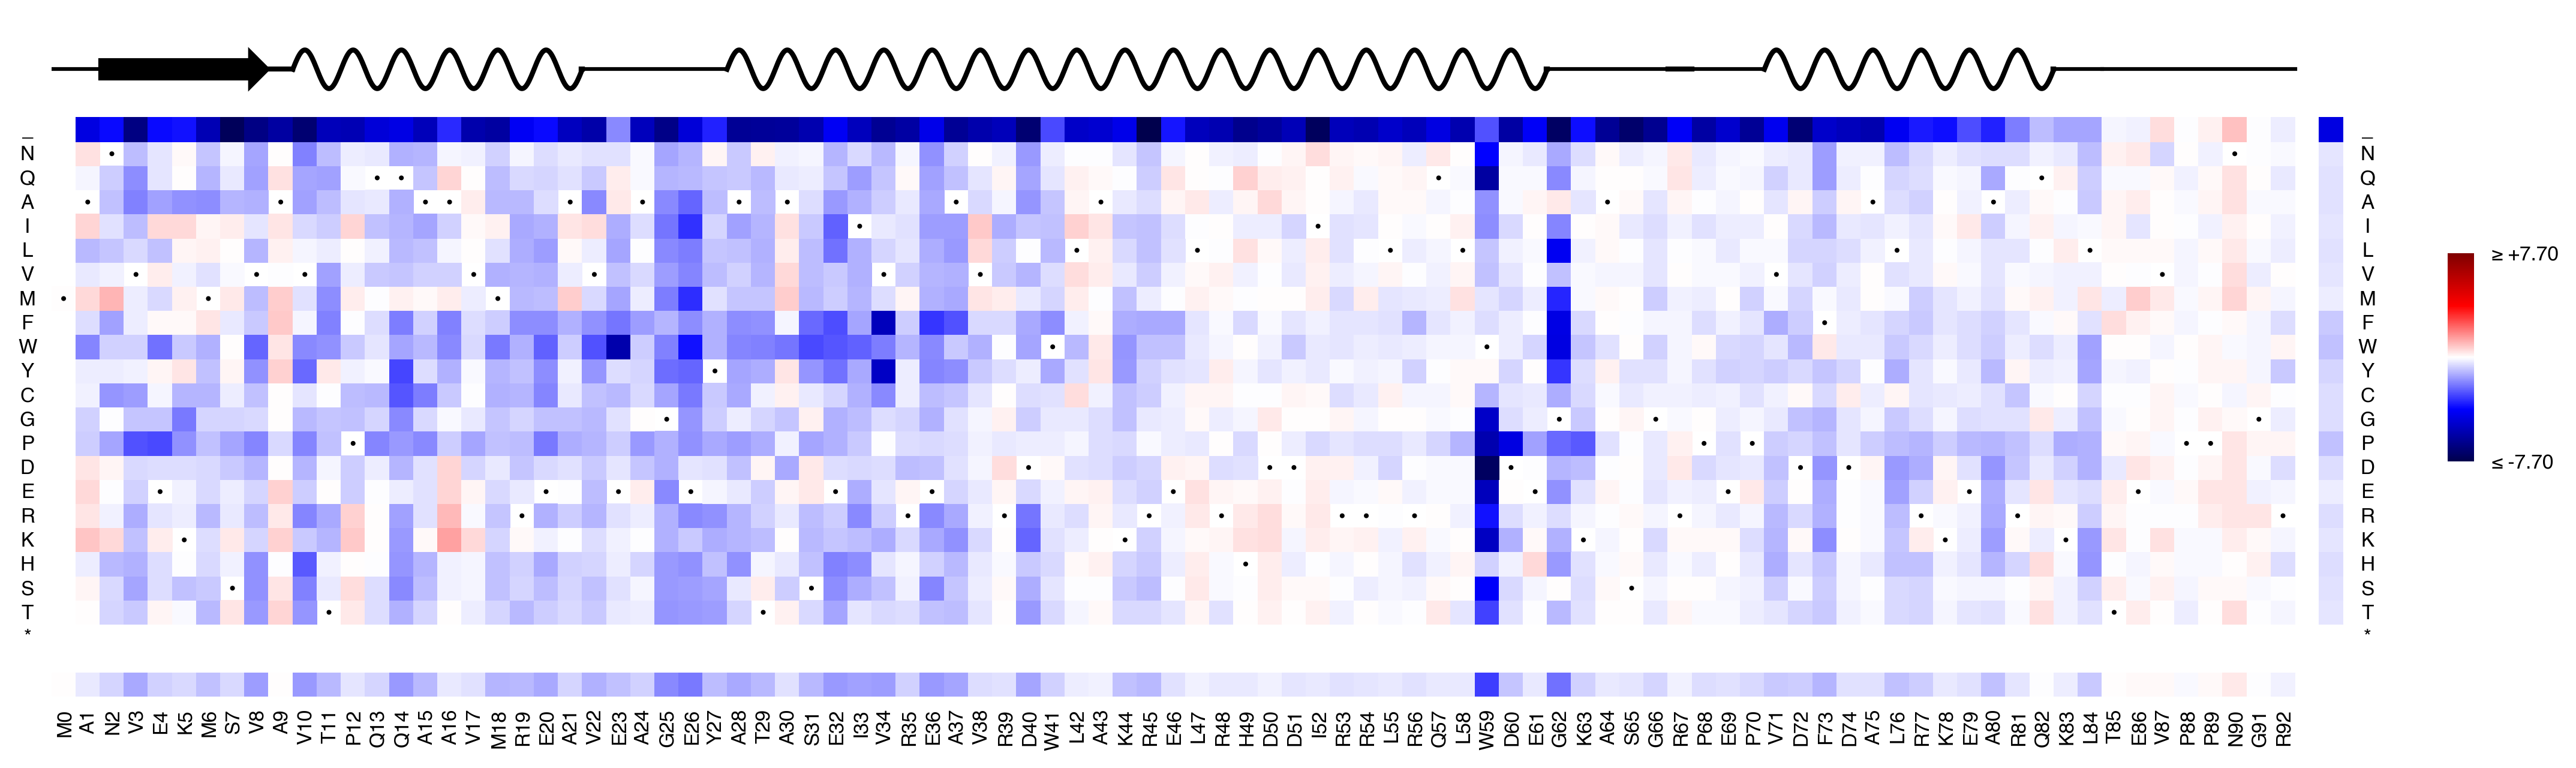

In [12]:
importlib.reload(pt)
importlib.reload(pmm)
pt.plot_fitness_heatmap_aa_df(df_at,fit_col='at_lib_mean_fit', 
                              fout = plot_out + 'wtAT_h_seismic', 
                              cmap_name = 'seismic',
                              p_title= '',
                              template='pard',
                              secondary_structure_segments = seq_seg_list_full_at)
plt.show()

# fig 2E +. suppl

using cmap:  seismic


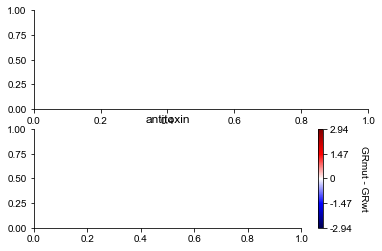

using cmap:  seismic


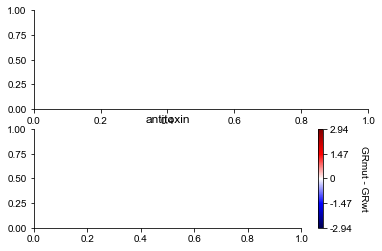

In [14]:
# make the antitoxin single mutant on the crystal structure plots.

# average mutation effect across all 20 amino acids
importlib.reload(pdbt)
importlib.reload(nbt)

df_mean_pos_t = nbt.get_mean_pos_fit(df_at)


dout = '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51/2009_out/singles/pdb/'

pdbt.plot_average_fit_singles_pdb(df_mean_pos_t, dout,
                                  pml_out_name = 'color_mean_fits_wtAt_spheres.pml',
                                  fit_col='at_lib_mean_fit', 
                                  pse_name= 'wtAT_spheres', 
                                  png_out_name = 'color_mean_fits_wtAt_spheres.png', 
                                 show_spheres=False, n_chains = 2, 
                                 cmap_name= 'seismic')


pdbt.plot_average_fit_singles_pdb(df_mean_pos_t, dout,
                                  pml_out_name = 'color_mean_fits_wtAt_spheres_n8.pml',
                                  fit_col='at_lib_mean_fit', 
                                  pse_name= 'wtAT_spheres_n8', 
                                  png_out_name = 'color_mean_fits_wtAt_spheres_n8.png', 
                                 show_spheres=False, cmap_name= 'seismic',
                                 n_chains = 8)

using cmap:  seismic


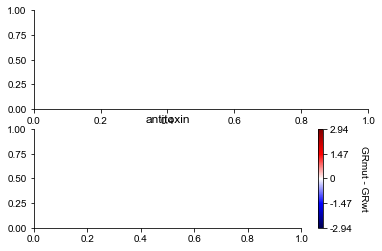

In [34]:
importlib.reload(pdbt)
dout = '/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51/2009_out/singles/pdb/'

pdbt.plot_average_fit_singles_pdb(df_mean_pos_t, dout,
                                  pml_out_name = 'color_mean_fits_wtAt_spheres.pml',
                                  fit_col='at_lib_mean_fit', 
                                  pse_name= 'wtAT_spheres', 
                                  png_out_name = 'color_mean_fits_wtAt_spheres.png', 
                                 show_spheres=False, n_chains = 2, 
                                 cmap_name= 'seismic')


# fig 2b toxin wt AT

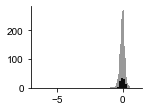

In [32]:
#load toxin wild-type
# plot reproducibility (same axis lims as above)
# plot single DFE
df_all_wt_at = pd.read_csv(pin + 'df_all_wt_at.csv')
df_all_wt_at = df_all_wt_at.set_index('aa_mut')
stop_fits_t = df_all_wt_at.loc[(df_all_wt_at.index.str[-1]=='_') & (df_all_wt_at.index.str[1:-1].astype(int) < 103)]['178_wtAT_mean_fit']


fig = plt.figure(figsize=(2,1.5))
plt.hist(df_all_wt_at['178_wtAT_mean_fit'], alpha=0.4, bins=30, label='all T*', histtype='stepfilled', color='black')
#plt.hist(norm_syn_means, bins=15, label='synonymous AT', alpha=0.5)
plt.hist(stop_fits_t, bins=5,alpha=0.9, label='truncated T*', color='black')
#plt.legend(labelspacing=0.1, prop={'size': 5})
#plt.ylabel('frequency')
#plt.xlabel('GRmut - GRwt')
plt.xlim((-7,1.5))
fig.patch.set_visible(False)
plt.savefig(plot_out + 't_syn_stop_hist.svg', format = 'svg')
plt.savefig(plot_out + 't_syn_stop_hist.pdf', format = 'pdf')
plt.show()

# Fig 2D mcs 

In [13]:
# get synonymous codon growth rates for no antitoxin
'''
# these samples must have come from 10k_n2 chain runs
# this takes a long time to read in.
bayes_mcs_dir = '/Users/davidding/Dropbox (HMS)/parESingleLibrary/ex51_set_up_additional_mutants/illumina/data/bayes_o2_2009/raw/doubles_ex47_l/'
df_fit_mcs = pd.read_csv(bayes_mcs_dir + 'df_sm_bhs_diff_w_aa_m_178_mcsAT.csv')


syn_cols_mcs = [c for c in df_fit_mcs.columns if c.startswith('w_cod[')]
syn_means_mcs = np.mean(df_fit_mcs[syn_cols_mcs])
w_aa_mean_mcs = np.mean(df_fit_mcs['w_aa'])
norm_syn_means_mcs = syn_means_mcs - w_aa_mean_mcs

# need to convert to log2?

#dump
pickle.dump(norm_syn_means_mcs, open(plot_out + 'norm_syn_means_mcs.p', 'wb'))
print('dones\n\n\n\ndones----------')
'''

norm_syn_means_mcs = pickle.load(open(plot_out + 'norm_syn_means_mcs.p', 'rb'))
norm_syn_means_mcs_log2 = norm_syn_means_mcs/np.log(2)

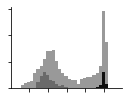

In [24]:
# load toxin single library at 1.2e-4% arabinose induction

df_all_mcs = pd.read_csv(pin + 'df_all_mcs.csv')
df_all_mcs = df_all_mcs.set_index('aa_mut')

# plot DFE

stop_fits_mcs = df_all_mcs.loc[(df_all_mcs.index.str[-1]=='_') & (df_all_mcs.index.str[1:-1].astype(int) < 103)]['0.00012_mean_fit']


fig = plt.figure(figsize=(2,1.5))
n, bins, patches = plt.hist(df_all_mcs['0.00012_mean_fit'], alpha=0.4, bins=30, label='all T*', histtype='stepfilled', color='black')

#synonymous
plt.hist(norm_syn_means_mcs_log2, bins=bins, label='synonymous AT', alpha=0.3, color='black')#color='#81b29a')

# plot synonymous , color='#81b29a'

plt.hist(stop_fits_mcs, bins=bins,alpha=0.9, label='truncated T*', color='black')
#plt.legend(labelspacing=0.1, prop={'size': 5}, loc='upper left')
#plt.ylabel('frequency')
#plt.xlabel('GR T* - GR Twt')
plt.xlim((-4, 8))
plt.xticks([-2,0,2,4,6], labels=[])
plt.yticks([0,100,200,300], labels=[])
fig.patch.set_visible(False)
plt.savefig(plot_out + 'mcs_syn_stop_hist.svg', format = 'svg')
plt.savefig(plot_out + 'mcs_syn_stop_hist.pdf', format = 'pdf')
plt.show()

# plot reproducibility between replicates.

# plot structure

# plot RSA

# plot secondary structure correlation.



In [16]:
plot_out

'/Users/davidding/PycharmProjects/pareSingleLibrary2/codebase/pairedEnd/x51/2009_out/processing/'